# Lesson 6 Assignment - Advertising Sales Regression

## Author - Kedar Ghayal



### Instructions  
Perform four different linear regressions on advertising sales data located in 'Advertising.csv'.  Your dependent feature is 'sales', a measure of sales of a product in a given market in thousands of dollars. 

The independent features for each of the first 3 separate regressions are:

 1. 'TV': advertising dollars spent on TV ads for a single product in a given market
 2. 'radio': advertising dollars spent on radio ads
 3. 'newspaper': advertising dollars spent on newspaper ads

For the first 3 linear regression performed:

- Produce a labeled graph showing the best fit line with the data points.
- Interpret both the slope and y-intercept.
 
The final regression(#4) includes all 3 features: (a) TV, (b) radio, and (c) newspaper. 
- Interpret each partial slope and the intercept parameters.
- Interpret the adjusted R-squared.
- Find and report the mean-squared error.

#### Please prepare this information for a client who may not understand what the parameters mean.


In [44]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.mode.chained_assignment = None 

In [45]:
# Load data
filename = 'https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/Advertising.csv'
ad_data = pd.read_csv(filename, index_col=0)
print(ad_data.head())
print(ad_data.shape)
ad_data.describe()

      TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9
(200, 4)


,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Intercept: 14.02250
Slope : 4.08122


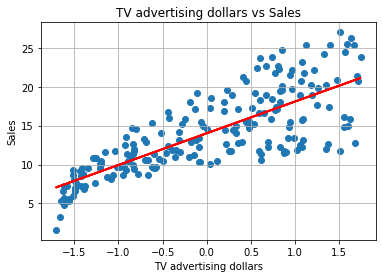

In [46]:
# Linear regression of sales using TV advertiing dollars as a feature.
import statsmodels.formula.api as sm
vars =['TV' , 'sales']
df_reg1 = ad_data[vars]

# Normalize the data
mean = df_reg1['TV'].mean()
std = df_reg1['TV'].std()
df_reg1['TV'] = (df_reg1['TV'] - mean )/std
    
ols_model = sm.ols(formula = 'sales ~ TV', data=df_reg1)

results = ols_model.fit()

# Get slope (m) and y-intercept (b)
print('Intercept: {0:.5f}'.format(results.params.Intercept))
print('Slope : {0:.5f}'.format(results.params.TV))

sales_pred = ols_model.fit().predict(df_reg1['TV'])
plt.scatter(df_reg1['TV'], df_reg1['sales'])
plt.plot(df_reg1['TV'], sales_pred, linewidth=2 , c = 'red')
plt.grid(True)
plt.xlabel('TV advertising dollars')
plt.ylabel('Sales')
plt.title('TV advertising dollars vs Sales')
plt.show()

Intercept: 14.02250
Slope : 3.00642


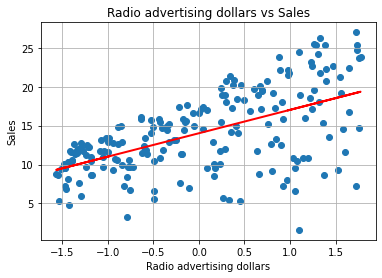

In [47]:
# Linear regression of sales using radio advertising dollars as a feature.
import statsmodels.formula.api as sm
vars =['radio' , 'sales']
df_reg1 = ad_data[vars]

# Normalize the data
mean = df_reg1['radio'].mean()
std = df_reg1['radio'].std()
df_reg1['radio'] = (df_reg1['radio'] - mean )/std
    
ols_model = sm.ols(formula = 'sales ~ radio', data=df_reg1)

results = ols_model.fit()

# Get slope (m) and y-intercept (b)
print('Intercept: {0:.5f}'.format(results.params.Intercept))
print('Slope : {0:.5f}'.format(results.params.radio))

sales_pred = ols_model.fit().predict(df_reg1['radio'])
plt.scatter(df_reg1['radio'], df_reg1['sales'])
plt.plot(df_reg1['radio'], sales_pred, linewidth=2 , c = 'red')
plt.grid(True)
plt.xlabel('Radio advertising dollars')
plt.ylabel('Sales')
plt.title('Radio advertising dollars vs Sales')
plt.show()

Intercept: 14.02250
Slope : 1.19114


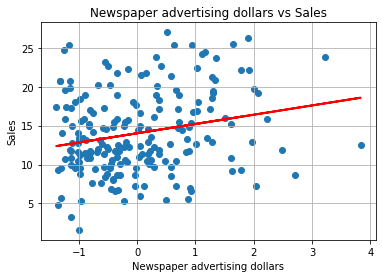

In [48]:
# Linear regression of sales using newspaper advertising dollars as a feature.
import statsmodels.formula.api as sm
vars =['newspaper' , 'sales']
df_reg1 = ad_data[vars]

# Normalize the data
mean = df_reg1['newspaper'].mean()
std = df_reg1['newspaper'].std()
df_reg1['newspaper'] = (df_reg1['newspaper'] - mean )/std
    
ols_model = sm.ols(formula = 'sales ~ newspaper', data=df_reg1)

results = ols_model.fit()

# Get slope (m) and y-intercept (b)
print('Intercept: {0:.5f}'.format(results.params.Intercept))
print('Slope : {0:.5f}'.format(results.params.newspaper))

sales_pred = ols_model.fit().predict(df_reg1['newspaper'])
plt.scatter(df_reg1['newspaper'], df_reg1['sales'])
plt.plot(df_reg1['newspaper'], sales_pred, linewidth=2 , c = 'red')
plt.grid(True)
plt.xlabel('Newspaper advertising dollars')
plt.ylabel('Sales')
plt.title('Newspaper advertising dollars vs Sales')
plt.show()

# Inference 1 

## From the 3 linear regressions done above:

### 1) TV dollars vs Sales

The baseline TV advertising spend is 147.025 units( Mean spend ) considered as 0.

When the Dollars spent on TV advertising is at 0 (baseline value) , the average sales are around 14 units ( Y -intercept)

For every unit increase/decrease in the normalized TV dollars spent above baseline, the Sales increase/decrease over the average by 4 units.

### 2) Radio dollars vs sales

The baseline radio advertising spend is 23.264 units( Mean spend ) considered as 0.

When the Dollars spent on Radio advertising is is at 0 (baseline value) , the average sales are around 14 units ( Y -intercept)

For every unit increase/decrease in the normalized Radio dollars spent, the Sales increase/decrease over the average by 3 units.

### 3) Newspaper dollars vs sales

The baseline newspaper advertising spend is 30.55 units( Mean spend ) considered as 0.

When the Dollars spent on Newspaper advertising is at 0 (baseline value) , the average sales are around 14 units ( Y -intercept)

For every unit increase/decrease in the normalized newspaper/decrease dollars spent, the Sales increase over the average by 1.19 units.

In [49]:
# Prepare the data for multiple regression & normalize the 3 features using standard scaler from sklearn.
x = ad_data[['TV','radio','newspaper']]
y = ad_data['sales']

# Scale the data. We will use the scaler later
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [50]:
# Perform multiple regression using StatsModels
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,r2_score
X = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
MSE = mean_squared_error(y,predictions)
print_model = model.summary()
print(print_model)
print( "MSE = {0}".format(MSE))

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 02 Jan 2021   Prob (F-statistic):           1.58e-96
Time:                        17:40:28   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.0225      0.119    117.655      0.0

# Inference 2

## Multiple regression

#### 1 ) From the multiple regression for Sales using all 3 features ( TV , radio, & newspaper spend) , we can conclude that when all the 3 spends are at their baselined 0 ( i.e. mean spend), the Sales are 14 units.

#### 2) For each unit increase in TV spend , the sales increase/decrease by 3.9 units.

#### 3) For each unit increase/decrease in Radio spend , the sales increase/decrease by 2.79 units.

#### 4) The newspaper spend has a negligible impact on the sales. Also the P value is very high for the newspaper category.
#### It implies that the newspaper category should be removed from the analysis.

#### 5) The Adjusted R2 for the above regression is close to 90%. It means that the ad spend features explain 90% of the variability of the Sales

#### 6) The Mean Squared Error for the multiple regression is around 2.78


    